In [30]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [31]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from kmodes.kprototypes import KPrototypes

In [32]:
data = pd.read_csv('segmentation-data.csv')
data

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0
1996,100001997,1,1,27,1,117744,1,0
1997,100001998,0,0,31,0,86400,0,0
1998,100001999,1,1,24,1,97968,0,0


In [33]:
temp = data[['ID','Age','Income']]

In [34]:
data.isnull().sum()

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [35]:
data.drop('ID', axis=1, inplace=True)
data

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0
1996,1,1,27,1,117744,1,0
1997,0,0,31,0,86400,0,0
1998,1,1,24,1,97968,0,0


**Scalling Dataset**

In [36]:
scaler = MinMaxScaler()
scaler.fit(data[['Age']])
data['Age'] = scaler.transform(data[['Age']])

scaler.fit(data[['Income']])
data['Income'] = scaler.transform(data[['Income']])
data

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,0.844828,2,0.324781,1,2
1,1,1,0.068966,1,0.420210,1,2
2,0,0,0.534483,1,0.195144,0,0
3,0,0,0.465517,1,0.496223,1,1
4,0,0,0.603448,1,0.413842,1,1
...,...,...,...,...,...,...,...
1995,1,0,0.500000,1,0.320595,0,0
1996,1,1,0.155172,1,0.299460,1,0
1997,0,0,0.224138,0,0.184871,0,0
1998,1,1,0.103448,1,0.227162,0,0


In [37]:
val_array = data.values

val_array[:,2] = val_array[:,2].astype(float)
val_array[:,4] = val_array[:,4].astype(float)

**Model**

In [42]:
kproto = KPrototypes(n_clusters=5, verbose=2, max_iter=20)
clusters = kproto.fit_predict(val_array, categorical=[0,1,3,5,6])

print(kproto.cluster_centroids_)
len(kproto.cluster_centroids_)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 570, ncost: 248.0354545358243
Run: 1, iteration: 2/20, moves: 312, ncost: 233.32412333254115
Run: 1, iteration: 3/20, moves: 63, ncost: 233.1628269249697
Run: 1, iteration: 4/20, moves: 4, ncost: 233.15976804834378
Run: 1, iteration: 5/20, moves: 0, ncost: 233.15976804834378
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 583, ncost: 268.6523601675936
Run: 2, iteration: 2/20, moves: 176, ncost: 265.6335289752233
Run: 2, iteration: 3/20, moves: 93, ncost: 264.61939497545325
Run: 2, iteration: 4/20, moves: 47, ncost: 264.3298058031611
Run: 2, iteration: 5/20, moves: 27, ncost: 264.25449757635937
Run: 2, iteration: 6/20, moves: 26, ncost: 264.17617879275747
Run: 2, iteration: 7/20, moves: 17, ncost: 264.1216607775645
Run: 2, iteration: 8/20,

5

In [43]:
cluster_col=[]
for c in clusters:
    cluster_col.append(c)

data['cluster'] = cluster_col

data[['ID','Age','Income']] = temp

In [44]:
data

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster,ID
0,0,0,67,2,124670,1,2,3,100000001
1,1,1,22,1,150773,1,2,2,100000002
2,0,0,49,1,89210,0,0,4,100000003
3,0,0,45,1,171565,1,1,0,100000004
4,0,0,53,1,149031,1,1,0,100000005
...,...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,1,100001996
1996,1,1,27,1,117744,1,0,2,100001997
1997,0,0,31,0,86400,0,0,4,100001998
1998,1,1,24,1,97968,0,0,1,100001999


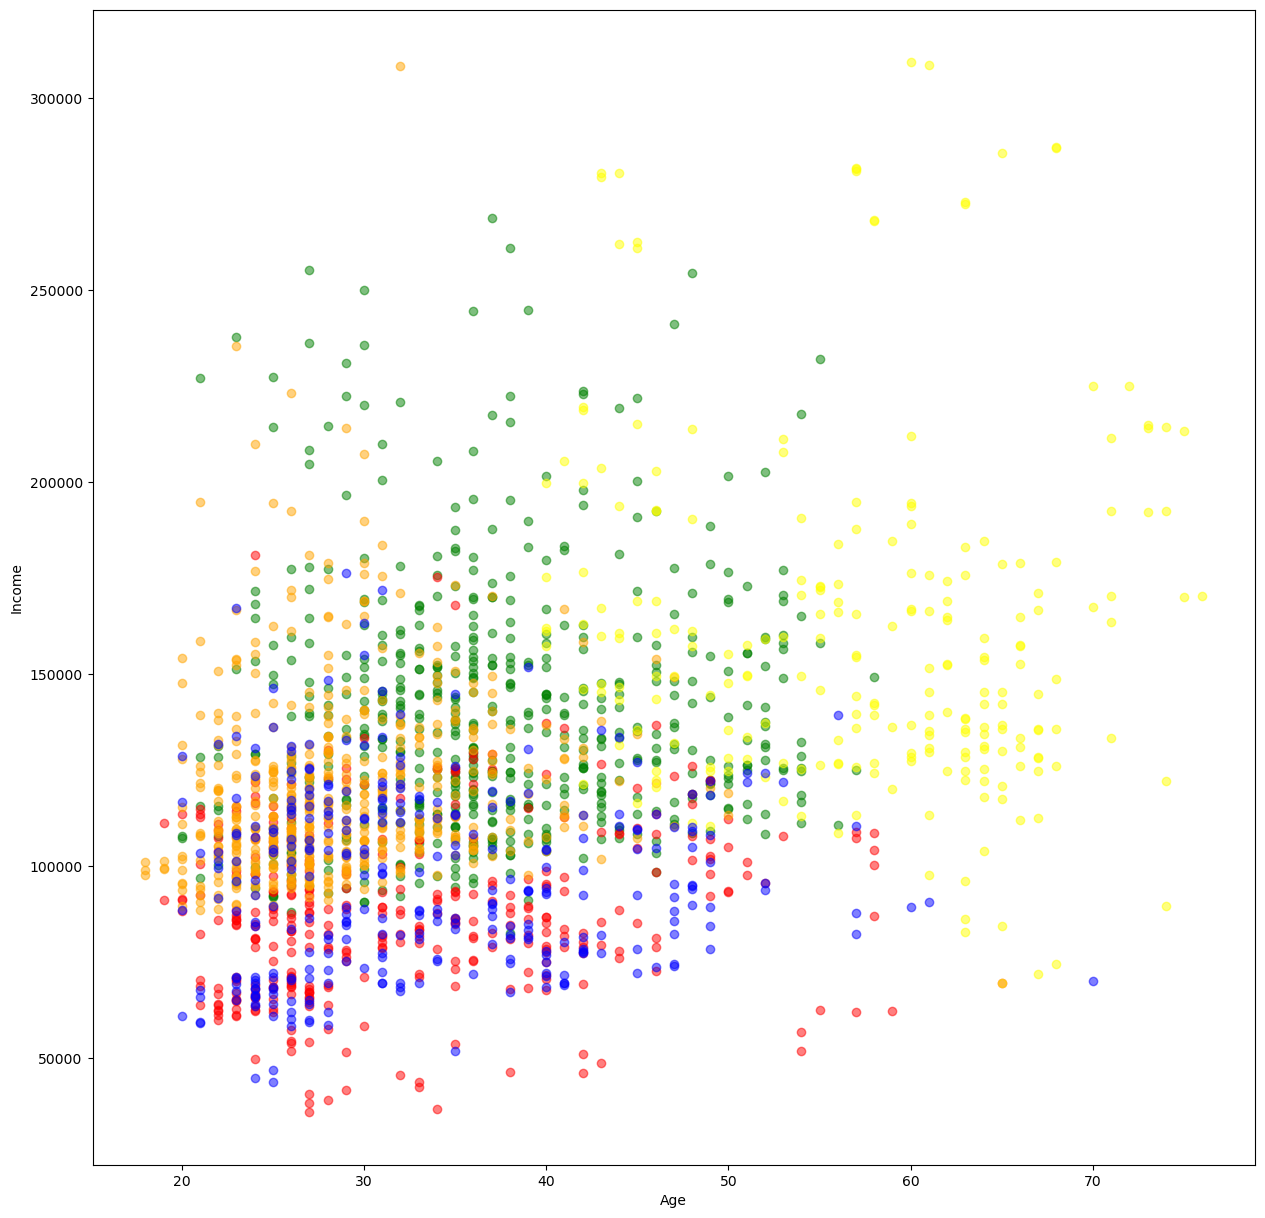

In [45]:
#colors = ['green', 'red', 'gray', 'orange', 'yellow', 'cyan', 'magenta', 'brown', 'purple', 'blue']
colors = ['green', 'red', 'orange', 'yellow','blue']

plt.figure(figsize=(15,15))
plt.xlabel('Age')
plt.ylabel('Income')

for i, col in zip(range(10), colors):
    dftemp = data[data.cluster==i]
    plt.scatter(dftemp.Age, dftemp['Income'], color=col, alpha=0.5)
    
plt.show()